

Práctico entregable 2025

Utilizar la base de jugadores “male_players.csv” disponible en la página de Kaggle https://www.kaggle.com/code/nongflook/football-player-performance-prediction?select=male_players.csv . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores  y no tiene exactamente el mismo formato.

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia. Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio inicial de la base.

2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.

3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?

4- Aplicación de clustering para encontrar grupos de jugadores con habilidades equivalentes, por ejemplo, jugadores que podrían intercambiarse en el caso de una lesión o cuando un jugador está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración… 

5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes los jugadores de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?

6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [ ]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

In [3]:
df = pd.read_csv('../data/male_players.csv')
df.shape

(16161, 58)

In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Rank', 'Name', 'OVR', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed',
       'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys',
       'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Position', 'Weak foot', 'Skill moves', 'Preferred foot', 'Height',
       'Weight', 'Alternative positions', 'Age', 'Nation', 'League', 'Team',
       'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [5]:
df.describe()

Unnamed: 0.1    Unnamed: 0          Rank           OVR           PAC  \
count  16161.000000  16161.000000  16161.000000  16161.000000  16161.000000   
mean    8080.000000   8080.000000   8934.139657     66.172390     68.149558   
std     4665.423186   4665.423186   5003.925857      6.761979     10.612153   
min        0.000000      0.000000      1.000000     47.000000     29.000000   
25%     4040.000000   4040.000000   5037.000000     62.000000     62.000000   
50%     8080.000000   8080.000000   9009.000000     66.000000     69.000000   
75%    12120.000000  12120.000000  13135.000000     70.000000     75.000000   
max    16160.000000  16160.000000  17717.000000     91.000000     97.000000   

                SHO           PAS           DRI           DEF           PHY  \
count  16161.000000  16161.000000  16161.000000  16161.000000  16161.000000   
mean      54.146835     58.434874     63.599158     50.591981     65.241755   
std       13.740389      9.660646      9.262399     16.323879      9.509657   
min       20.000000     25.000000     29.000000     15.000000     32.000000   
25%       45.000000     52.000000     58.000000     36.000000     59.000000   
50%       57.000000     59.000000     64.000000     55.000000     66.000000   
75%       64.000000     65.000000     70.000000     64.000000     72.000000   
max       93.000000     94.000000     92.000000     89.000000     91.000000   

       Acceleration  Sprint Speed   Positioning     Finishing    Shot Power  \
count  16161.000000  16161.000000  16161.000000  16161.000000  16161.000000   
mean      64.778727     64.812264     50.983293     46.680218     58.000990   
std       15.478648     15.258747     19.903044     19.912475     12.876878   
min       15.000000     15.000000      3.000000      3.000000     20.000000   
25%       57.000000     57.000000     40.000000     31.000000     48.000000   
50%       68.000000     68.000000     57.000000     51.000000     59.000000   
75%       75.000000     75.000000     65.000000     63.000000     68.000000   
max       97.000000     97.000000     96.000000     96.000000     94.000000   

         Long Shots       Volleys     Penalties        Vision      Crossing  \
count  16161.000000  16161.000000  16161.000000  16161.000000  16161.000000   
mean      46.934719     42.579543     47.614813     54.865107     49.554916   
std       19.479070     17.707794     15.710242     13.370436     17.922018   
min        5.000000      5.000000     10.000000     15.000000      8.000000   
25%       32.000000     30.000000     38.000000     46.000000     39.000000   
50%       51.000000     44.000000     49.000000     57.000000     54.000000   
75%       62.000000     56.000000     59.000000     65.000000     63.000000   
max       90.000000     92.000000     93.000000     95.000000     95.000000   

       Free Kick Accuracy  Short Passing  Long Passing         Curve  \
count        16161.000000   16161.000000  16161.000000  16161.000000   
mean            42.770621      59.507766     54.207165     48.118743   
std             16.956133      14.183703     14.424724     18.084827   
min              6.000000      13.000000     11.000000      7.000000   
25%             31.000000      55.000000     46.000000     36.000000   
50%             42.000000      63.000000     57.000000     50.000000   
75%             55.000000      68.000000     64.000000     62.000000   
max             94.000000      94.000000     93.000000     93.000000   

          Dribbling       Agility       Balance     Reactions  Ball Control  \
count  16161.000000  16161.000000  16161.000000  16161.000000  16161.000000   
mean      56.346946     63.664687     64.103088     62.223934     59.039787   
std       18.810193     15.097148     14.640849      8.757220     16.712129   
min        5.000000     19.000000     20.000000     30.000000     10.000000   
25%       51.000000     55.000000     56.000000     57.000000     55.000000   
50%       62.000000     66.000000   

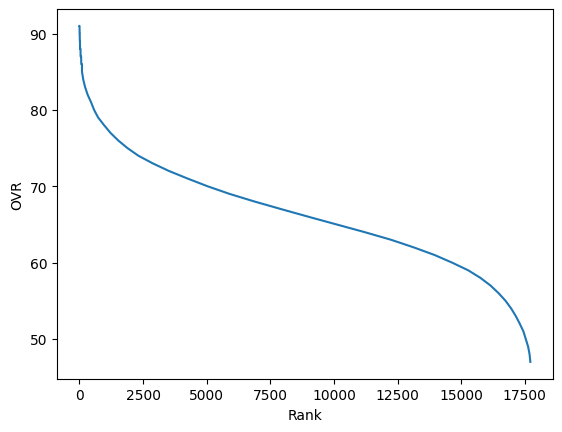

In [6]:
plt.plot(df['Rank'], df['OVR'])
df.groupby('Position')
plt.xlabel('Rank')
plt.ylabel('OVR')

plt.show()

In [7]:
df.isnull().sum()

Unnamed: 0.1                 0
Unnamed: 0                   0
Rank                         0
Name                         0
OVR                          0
PAC                          0
SHO                          0
PAS                          0
DRI                          0
DEF                          0
PHY                          0
Acceleration                 0
Sprint Speed                 0
Positioning                  0
Finishing                    0
Shot Power                   0
Long Shots                   0
Volleys                      0
Penalties                    0
Vision                       0
Crossing                     0
Free Kick Accuracy           0
Short Passing                0
Long Passing                 0
Curve                        0
Dribbling                    0
Agility                      0
Balance                      0
Reactions                    0
Ball Control                 0
Composure                    0
Interceptions                0
Heading 

In [8]:
df = df.fillna(0)

In [9]:
df.isnull().sum()

Unnamed: 0.1             0
Unnamed: 0               0
Rank                     0
Name                     0
OVR                      0
PAC                      0
SHO                      0
PAS                      0
DRI                      0
DEF                      0
PHY                      0
Acceleration             0
Sprint Speed             0
Positioning              0
Finishing                0
Shot Power               0
Long Shots               0
Volleys                  0
Penalties                0
Vision                   0
Crossing                 0
Free Kick Accuracy       0
Short Passing            0
Long Passing             0
Curve                    0
Dribbling                0
Agility                  0
Balance                  0
Reactions                0
Ball Control             0
Composure                0
Interceptions            0
Heading Accuracy         0
Def Awareness            0
Standing Tackle          0
Sliding Tackle           0
Jumping                  0
S

In [10]:
df.groupby('Position').describe()

Unnamed: 0.1                                                   \
                count         mean          std   min      25%     50%   
Position                                                                 
CAM             961.0  7800.395421  4829.923940   3.0  3229.00  7815.0   
CB             2924.0  7772.322503  4510.767106  12.0  3881.00  7626.0   
CDM            1330.0  7493.322556  4534.754243   1.0  3779.75  7129.5   
CM             1890.0  8229.797354  4780.296847   5.0  4008.75  8426.5   
GK             1816.0  9089.513767  4939.864271   8.0  4709.25  9787.5   
LB             1214.0  8374.280066  4478.247979  32.0  4590.50  8415.5   
LM              968.0  7742.683884  4496.946316  51.0  3842.50  7577.0   
LW              341.0  7937.334311  4896.547640   4.0  3414.00  8340.0   
RB             1281.0  8282.022639  4507.502301  54.0  4439.00  8417.0   
RM              896.0  7654.043527  4483.962981  76.0  3844.25  7538.0   
RW              357.0  8172.935574  4979.483841  14.0  4065.00  8001.0   
ST             2183.0  8052.441136  4645.047651   0.0  4100.50  7980.0   

                            Unnamed: 0                                  \
               75%      max      count         mean          std   min   
Position                                                                 
CAM       11933.00  16156.0      961.0  7800.395421  4829.923940   3.0   
CB        11452.25  16131.0     2924.0  7772.322503  4510.767106  12.0   
CDM       11331.00  16160.0     1330.0  7493.322556  4534.754243   1.0   
CM        12421.00  16159.0     1890.0  8229.797354  4780.296847   5.0   
GK        13632.50  16138.0     1816.0  9089.513767  4939.864271   8.0   
LB        12186.25  16139.0     1214.0  8374.280066  4478.247979  32.0   
LM        11564.75  16091.0      968.0  7742.683884  4496.946316  51.0   
LW        12294.00  16109.0      341.0  7937.334311  4896.547640   4.0   
RB        12070.00  16158.0     1281.0  8282.022639  4507.502301  54.0   
RM        11313.25  16153.0      896.0  7654.043527  4483.962981  76.0   
RW        12838.00  16118.0      357.0  8172.935574  4979.483841  14.0   
ST        12146.50  16148.0     2183.0  8052.441136  4645.047651   0.0   

                                                Rank                \
              25%     50%       75%      max   count          mean   
Position                                                             
CAM       3229.00  7815.0  11933.00  16156.0   961.0   8644.994797   
CB        3881.00  7626.0  11452.25  16131.0  2924.0   8599.952462   
CDM       3779.75  7129.5  11331.00  16160.0  1330.0   8304.699248   
CM        4008.75  8426.5  12421.00  16159.0  1890.0   9097.626984   
GK        4709.25  9787.5  13632.50  16138.0  1816.0  10014.430066   
LB        4590.50  8415.5  12186.25  16139.0  1214.0   9249.505766   
LM        3842.50  7577.0  11564.75  16091.0   968.0   8574.728306   
LW        3414.00  8340.0  12294.00  16109.0   341.0   8781.917889   
RB        4439.00  8417.0  12070.00  16158.0  1281.0   9144.174083   
RM        3844.25  7538.0  11313.25  16153.0   896.0   8478.570312   
RW        4065.00  8001.0  12838.00  16118.0   357.0   9044.053221   
ST        4100.50  7980.0  12146.50  16148.0  2183.0   8905.852497   

                                                                    OVR  \
                  std    min     25%      50%      75%      max   count   
Position                                                                  
CAM       5188.285680    5.0  3521.0   9009.0  13135.0  17717.0   961.0   
CB        4833.222731   20.0  4260.0   7937.0  12239.0  17686.0  2924.0   
CDM       4861.113254    2.0  4260.0   7937.0  12239.0  17717.0  1330.0   
CM        5126.624680    9.0  5037.0   9009.0  13135.0  17717.0  1890.0   
GK        5310.153025   13.0  5037.0  11203.0  14644.0  17686.0  1816.0   
LB        4798.425494   50.0  5037.0   9009.0  13135.0  17686.0  1214.0   
LM        4817.657497   76.0  4260.0   7937.0  12239.0  17629

In [11]:
gen_atrib = ['PAC', 'SHO', 'PAS', 'DRI','DEF', 'PHI']

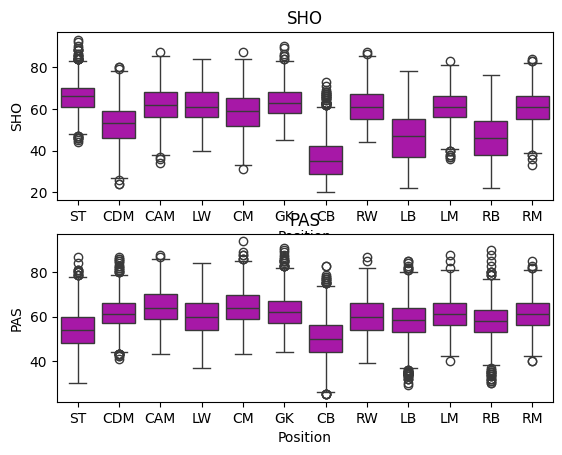

In [12]:
# Create a 2x1 grid of subplots
plt.subplot(2, 1, 1)
sns.boxplot(x="Position", y="SHO",
            palette=["m"],
            data=df)
plt.title('SHO')

plt.subplot(2, 1, 2)
sns.boxplot(x="Position", y="PAS",
            palette=["m"],
            data=df)
plt.title('PAS')

plt.show()

In [13]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Rank', 'Name', 'OVR', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed',
       'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys',
       'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Position', 'Weak foot', 'Skill moves', 'Preferred foot', 'Height',
       'Weight', 'Alternative positions', 'Age', 'Nation', 'League', 'Team',
       'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes'],
      dtype='object')

## Dropear columnas innecesarias
## Elegir atributos interesantes

In [14]:
posiciones = {
    "LW": "forwards",
    "RW": "forwards",
    "LM": "forwards",
    "RM": "forwards",
    "LB": "defenders",
    "RB": "defenders",
    "CB": "defenders",
    "CDM": "midfielders",
    "CM": "midfielders",
    "CAM": "midfielders",
    "ST": "forwards",
    "GK": "goalkeeper"
}

df["Position_simple"] = df["Position"].map(posiciones)


## Características de cada posición

<Axes: xlabel='Ball Control', ylabel='Def Awareness'>

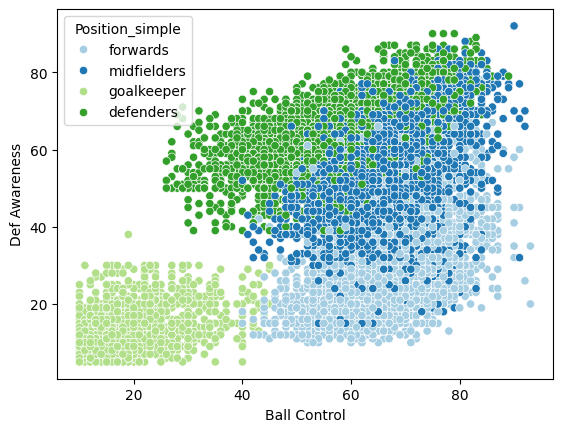

In [15]:
sns.scatterplot(data=df, x="Ball Control", y="Def Awareness", hue="Position_simple", palette="Paired")

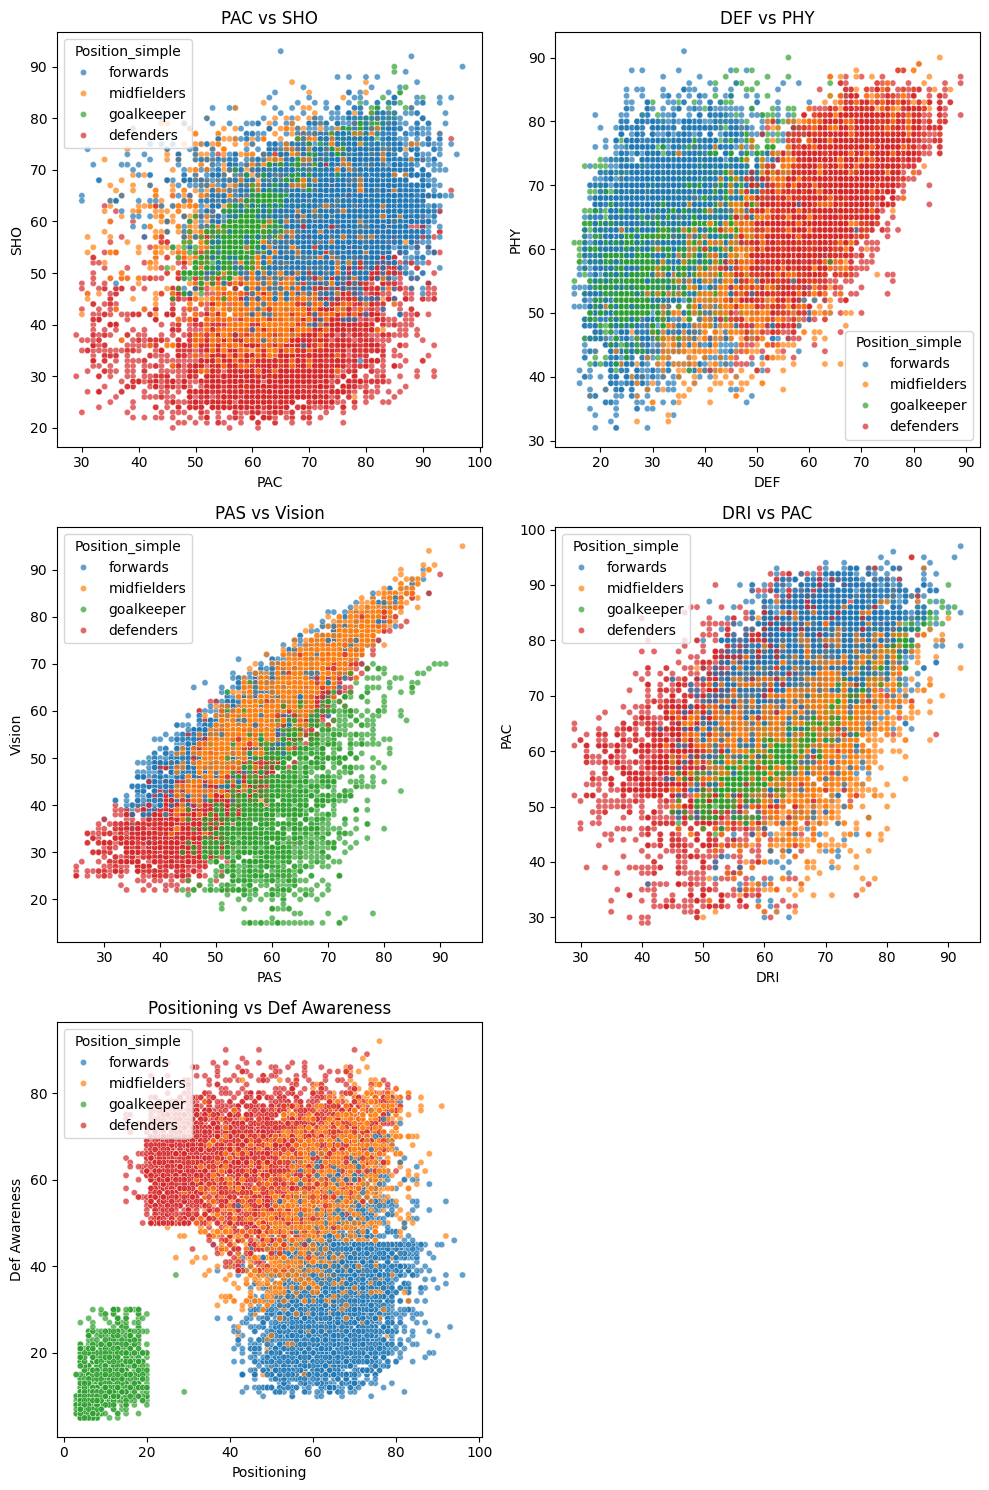

In [16]:
# Pares de variables recomendados
pairs = [
    ("PAC", "SHO"),          # Rápidos y goleadores
    ("DEF", "PHY"),          # Defensivos y físicos
    ("PAS", "Vision"),       # Creatividad y distribución
    ("DRI", "PAC"),          # Habilidad y velocidad
    ("Positioning", "Def Awareness")  # Ofensivo vs Defensivo
]

# Crear figura
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten()

for i, (x, y) in enumerate(pairs):
    sns.scatterplot(
        data=df, x=x, y=y,
        hue="Position_simple",   # colores según rol simplificado
        alpha=0.7, s=20, ax=axes[i]
    )
    axes[i].set_title(f"{x} vs {y}")

# Eliminar subplot vacío si hay
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


#### Mejores jugadores por posición:

In [17]:
best_players_per_position=df.iloc[df.groupby(df['Position'])['OVR'].idxmax()][['Position','Name','OVR']]
best_players_per_position

Position                  Name  OVR
3       CAM       Jude Bellingham   90
12       CB       Virgil van Dijk   89
1       CDM                 Rodri   91
5        CM       Kevin De Bruyne   90
8        GK  Gianluigi Donnarumma   89
32       LB        Theo Hernández   87
51       LM              Grimaldo   86
4        LW              Vini Jr.   90
54       RB              Carvajal   86
76       RM          Riyad Mahrez   85
14       RW         Mohamed Salah   89
0        ST         Kylian Mbappé   91

### Conteos por posiciones

In [18]:
pd.DataFrame(df.Position.value_counts().sort_index())

count
Position       
CAM         961
CB         2924
CDM        1330
CM         1890
GK         1816
LB         1214
LM          968
LW          341
RB         1281
RM          896
RW          357
ST         2183

In [19]:
df.groupby('Position')['OVR'].describe()

count       mean       std   min   25%   50%   75%   max
Position                                                           
CAM        961.0  66.558793  7.097603  47.0  62.0  66.0  72.0  90.0
CB        2924.0  66.604993  6.429032  48.0  63.0  67.0  71.0  89.0
CDM       1330.0  66.981955  6.564238  47.0  63.0  67.0  71.0  91.0
CM        1890.0  65.912169  7.108232  47.0  62.0  66.0  70.0  90.0
GK        1816.0  64.747247  7.407278  48.0  60.0  64.0  70.0  89.0
LB        1214.0  65.747941  6.339714  48.0  62.0  66.0  70.0  87.0
LM         968.0  66.634298  6.173177  49.0  63.0  67.0  71.0  86.0
LW         341.0  66.565982  7.364814  48.0  62.0  66.0  71.0  90.0
RB        1281.0  65.901639  6.326260  47.0  62.0  66.0  70.0  86.0
RM         896.0  66.742188  6.257549  47.0  63.0  67.0  71.0  85.0
RW         357.0  66.151261  7.712865  48.0  61.0  66.0  70.0  89.0
ST        2183.0  66.238662  6.759135  47.0  62.0  66.0  70.0  91.0

Antes de reducir la base filtrando por OVR, verificamos la distribución de OVR en las distintas posiciones para evitar que el filtro distorsione la estructura del conjunto de datos. 

In [20]:
df_n = df[(df['OVR']>70)]


In [21]:
df.shape, df_n.shape

((16161, 59), (3992, 59))

## Características por posición PAC, SHO, PAS DRI, DEF, PHY

In [71]:
df_pos = df.groupby('Position_simple').agg(
    PAC = ("PAC","mean"),
    SHO = ("SHO","mean"),
    PAS = ("PAS","mean"),
    DRI = ("DRI", "mean"),
    DEF = ("DEF", "mean"),
    PHY = ("PHY", "mean")
)

df_pos

PAC        SHO        PAS        DRI        DEF  \
Position_simple                                                          
defenders        65.942609  40.863074  53.705481  57.675770  64.034324   
forwards         74.049104  63.192202  57.865964  66.853952  35.354057   
goalkeeper       65.282489  63.281388  62.361784  66.120595  35.488436   
midfielders      65.559914  57.130830  63.504664  66.487443  57.022961   

                       PHY  
Position_simple             
defenders        68.933752  
forwards         62.069758  
goalkeeper       63.645925  
midfielders      64.749581

In [76]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Rank', 'Name', 'OVR', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed',
       'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys',
       'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Position', 'Weak foot', 'Skill moves', 'Preferred foot', 'Height',
       'Weight', 'Alternative positions', 'Age', 'Nation', 'League', 'Team',
       'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Position_simple'],
      dtype='object')

In [77]:
df_pos_2 = df.groupby('Position').agg(
    PAC = ("PAC","mean"),
    SHO = ("SHO","mean"),
    PAS = ("PAS","mean"),
    DRI = ("DRI", "mean"),
    DEF = ("DEF", "mean"),
    PHY = ("PHY", "mean"),
    Positioning = ("Positioning", "mean"),
    Finishing = ("Finishing", "mean"),
    ShotPower = ("Shot Power", "mean"),
    LongShots = ("Long Shots", "mean"),
    Volleys = ("Volleys", "mean"),
    Penalties = ("Penalties", "mean")
)

df_pos_2.sort_values('SHO')



PAC        SHO        PAS        DRI        DEF        PHY  \
Position                                                                     
CB        59.885773  36.475034  50.033174  52.913475  66.371067  71.849521   
RB        73.093677  45.773614  57.712724  63.129586  61.483997  65.992194   
LB        72.985173  46.250412  58.322076  63.391269  61.097199  65.014827   
CDM       62.021805  52.371429  61.652632  63.975188  63.986466  69.357895   
CM        65.821693  58.194180  64.402116  66.982011  58.756085  64.933862   
RM        77.664062  60.527902  61.110491  68.358259  41.100446  58.875000   
LM        77.029959  60.740702  61.175620  68.573347  40.288223  58.352273   
CAM       69.941727  61.626431  64.302810  68.991675  43.977107  58.009365   
RW        76.929972  61.644258  60.212885  68.761905  35.815126  56.666667   
LW        77.425220  61.944282  60.521994  69.448680  34.322581  56.501466   
GK        65.282489  63.281388  62.361784  66.120595  35.488436  63.645925   
ST        70.245076  65.820889  54.267980  64.756757  30.893266  66.782868   

          Positioning  Finishing  ShotPower  LongShots    Volleys  Penalties  
Position                                                                      
CB          37.079001  31.905951  49.151847  33.869357  32.036252  40.658687  
RB          55.725995  42.852459  52.644028  44.799375  39.388759  44.412959  
LB          55.820428  42.791598  53.553542  46.188633  39.991763  44.738056  
CDM         54.739098  48.533083  61.218797  53.990977  44.230827  50.133835  
CM          62.044974  56.204233  63.460847  59.438095  50.557143  53.320635  
RM          62.863839  60.989955  64.016741  58.177455  53.206473  56.342634  
LM          62.807851  61.243802  63.934917  58.630165  53.607438  56.430785  
CAM         63.736733  61.629553  64.290323  60.893861  55.124870  57.730489  
RW          63.210084  62.501401  64.557423  59.058824  54.820728  56.767507  
LW          63.102639  62.741935  65.085044  59.492669  55.431085  56.997067  
GK           9.595815  10.369493  46.903084  10.869493  10.678414  18.235132  
ST          67.071919  67.701328  67.967476  61.090701  59.854329  63.469537

In [60]:
df_pos = df_n.groupby('Position_simple', as_index=False).agg(
    PAC = ("PAC","mean"),
    SHO = ("SHO","mean"),
    PAS = ("PAS","mean"),
    DRI = ("DRI", "mean"),
    DEF = ("DEF", "mean"),
    PHY = ("PHY", "mean")
)

df_pos

Position_simple        PAC        SHO        PAS        DRI        DEF  \
0       defenders  68.324053  47.546017  62.369683  65.406806  73.037896   
1        forwards  77.802980  72.037252  67.139901  75.046358  40.693709   
2      goalkeeper  75.336815  72.906005  71.639687  76.783290  42.464752   
3     midfielders  67.157040  66.619134  72.326715  74.536101  64.090253   

         PHY  
0  74.580046  
1  67.942881  
2  74.342037  
3  70.498195

In [65]:
df_pos = df_pos.sort_values(by='DEF')

<Axes: xlabel='Position_simple', ylabel='SHO'>

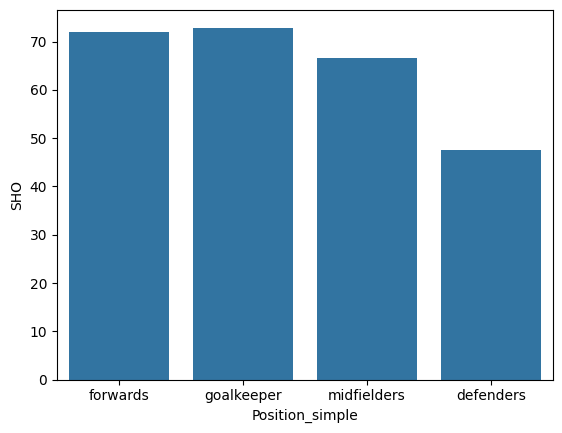

In [66]:
sns.barplot(data=df_pos, x="Position_simple", y="SHO")


([<matplotlib.axis.XTick at 0x7af177e32ba0>,
 [Text(0.0, 0, 'forwards'),
  Text(1.0, 0, 'goalkeeper'),
  Text(2.0, 0, 'midfielders'),
  Text(3.0, 0, 'defenders')])

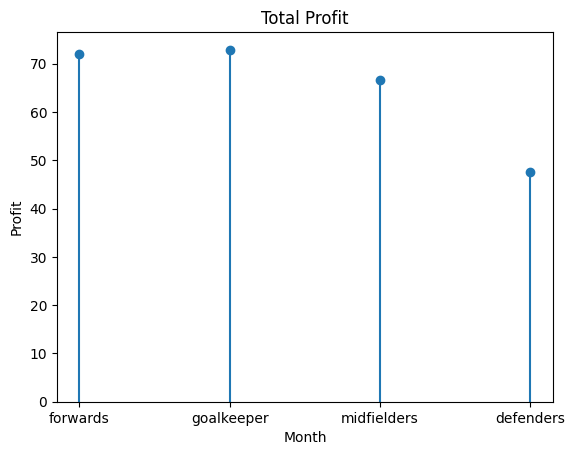

In [67]:
# Reorder it following the values:
# order_SHO = df_pos.sort_values(by='SHO')
# using subplots() to draw vertical lines
fig, axes = plt.subplots()
axes.vlines(df_pos['Position_simple'], ymin=0, ymax=df_pos['SHO'])

# df_posrawing the markers (circle)
axes.plot(df_pos['Position_simple'], df_pos['SHO'], "o")
axes.set_ylim(0)

# formatting andf_pos df_posetails
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Total Profit')
plt.xticks(df_pos['Position_simple'])


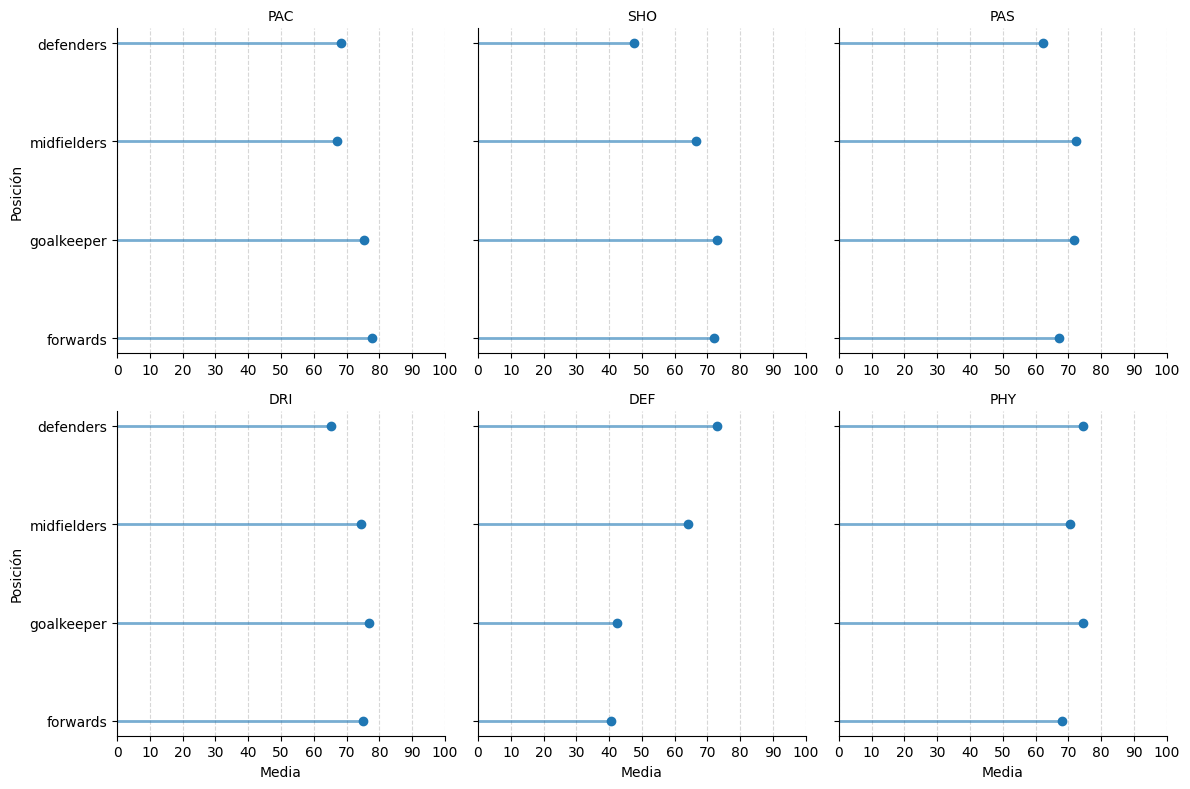

In [ ]:
# 1. Pasar de ancho → largo
df_long = df_pos.melt(
    id_vars="Position_simple", 
    value_vars=["PAC","SHO","PAS","DRI","DEF","PHY"],
    var_name="Attribute", 
    value_name="Mean"
)

# 2. Crear FacetGrid con seaborn
g = sns.FacetGrid(
    df_long, 
    col="Attribute", 
    col_wrap=3,   # 3 columnas por fila
    sharex=False, 
    height=4
)

# 3. Agregar lollipop chart manual (línea + punto)
def lollipop(x, y, color, **kwargs):
    plt.hlines(y=y, xmin=0, xmax=x, color=color, alpha=0.6, linewidth=2)
    plt.plot(x, y, "o", color=color)

g.map(lollipop, "Mean", "Position_simple")


# 4. Ajustes estéticos
g.set_titles("{col_name}")
g.set_axis_labels("Media", "Posición")

for ax in g.axes.flatten():
    ax.grid(True, axis="x", linestyle="--", alpha=0.5)
    # Fijar rango 0-100
    ax.set_xlim(0, 100)
    # Ticks cada 10
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()
plt.show()

| **Atributo general**                             | **Características específicas que lo componen**                                                          |
| ------------------------------------------------ | -------------------------------------------------------------------------------------------------------- |
| **PAC (Pace / Velocidad)**                       | `Acceleration`, `SprintSpeed`                                                                            |
| **DRI (Dribbling / Regate)**                     | `Agility`, `Balance`, `Reactions`, `BallControl`, `Dribbling`, `Composure`                               |
| **DEF (Defending / Defensa)**                    | `Interceptions`, `HeadingAccuracy`, `Marking`, `StandingTackle`, `SlidingTackle`                         |
| **SHO (Shooting / Tiro)**                        | `Positioning`, `Finishing`, `ShotPower`, `LongShots`, `Volleys`, `Penalties`                             |
| **PAS (Passing / Pase)**                         | `Vision`, `Crossing`, `FreeKickAccuracy`, `ShortPassing`, `LongPassing`, `Curve`                         |
| **PHY (Physical / Físico)**                      | `Jumping`, `Stamina`, `Strength`, `Aggression`                                                           |
| **POS (Overall Positioning o Posición general)** | No es un atributo de habilidad en sí, sino la posición del jugador en el campo (`ST`, `CM`, `CB`, etc.). |


En general, los forwards se diferencian del resto por su alto 

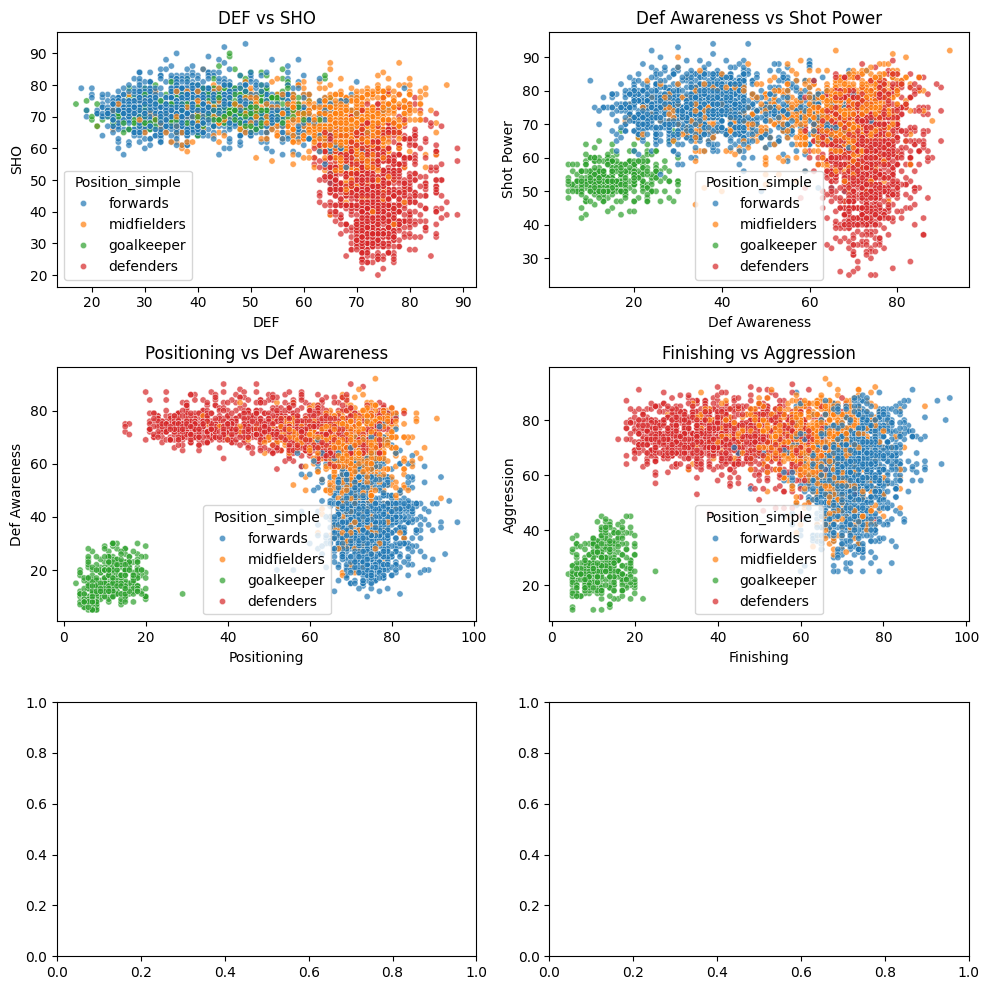

In [22]:
pairs = [
    ("DEF", "SHO"),          
    ("Def Awareness", "Shot Power"),          
    ("Positioning", "Def Awareness"), 
    ("Finishing", "Aggression")  
]

# Crear figura
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

for i, (x, y) in enumerate(pairs):
    sns.scatterplot(
        data=df_n, x=x, y=y,
        hue="Position_simple",   # colores según rol simplificado
        alpha=0.7, s=20, ax=axes[i]
    )
    axes[i].set_title(f"{x} vs {y}")


plt.tight_layout()
plt.show()


In [23]:
interesting_skills = ['Positioning', 'Finishing', 'Interceptions','Def Awareness', 'Sliding Tackle', 'Aggression']

Positioning y FInishing muestran perfiles muy similares, pero Finishing muestra mejor separación entre midfields y defenders, por lo que nos quedaremos con esta variable. 

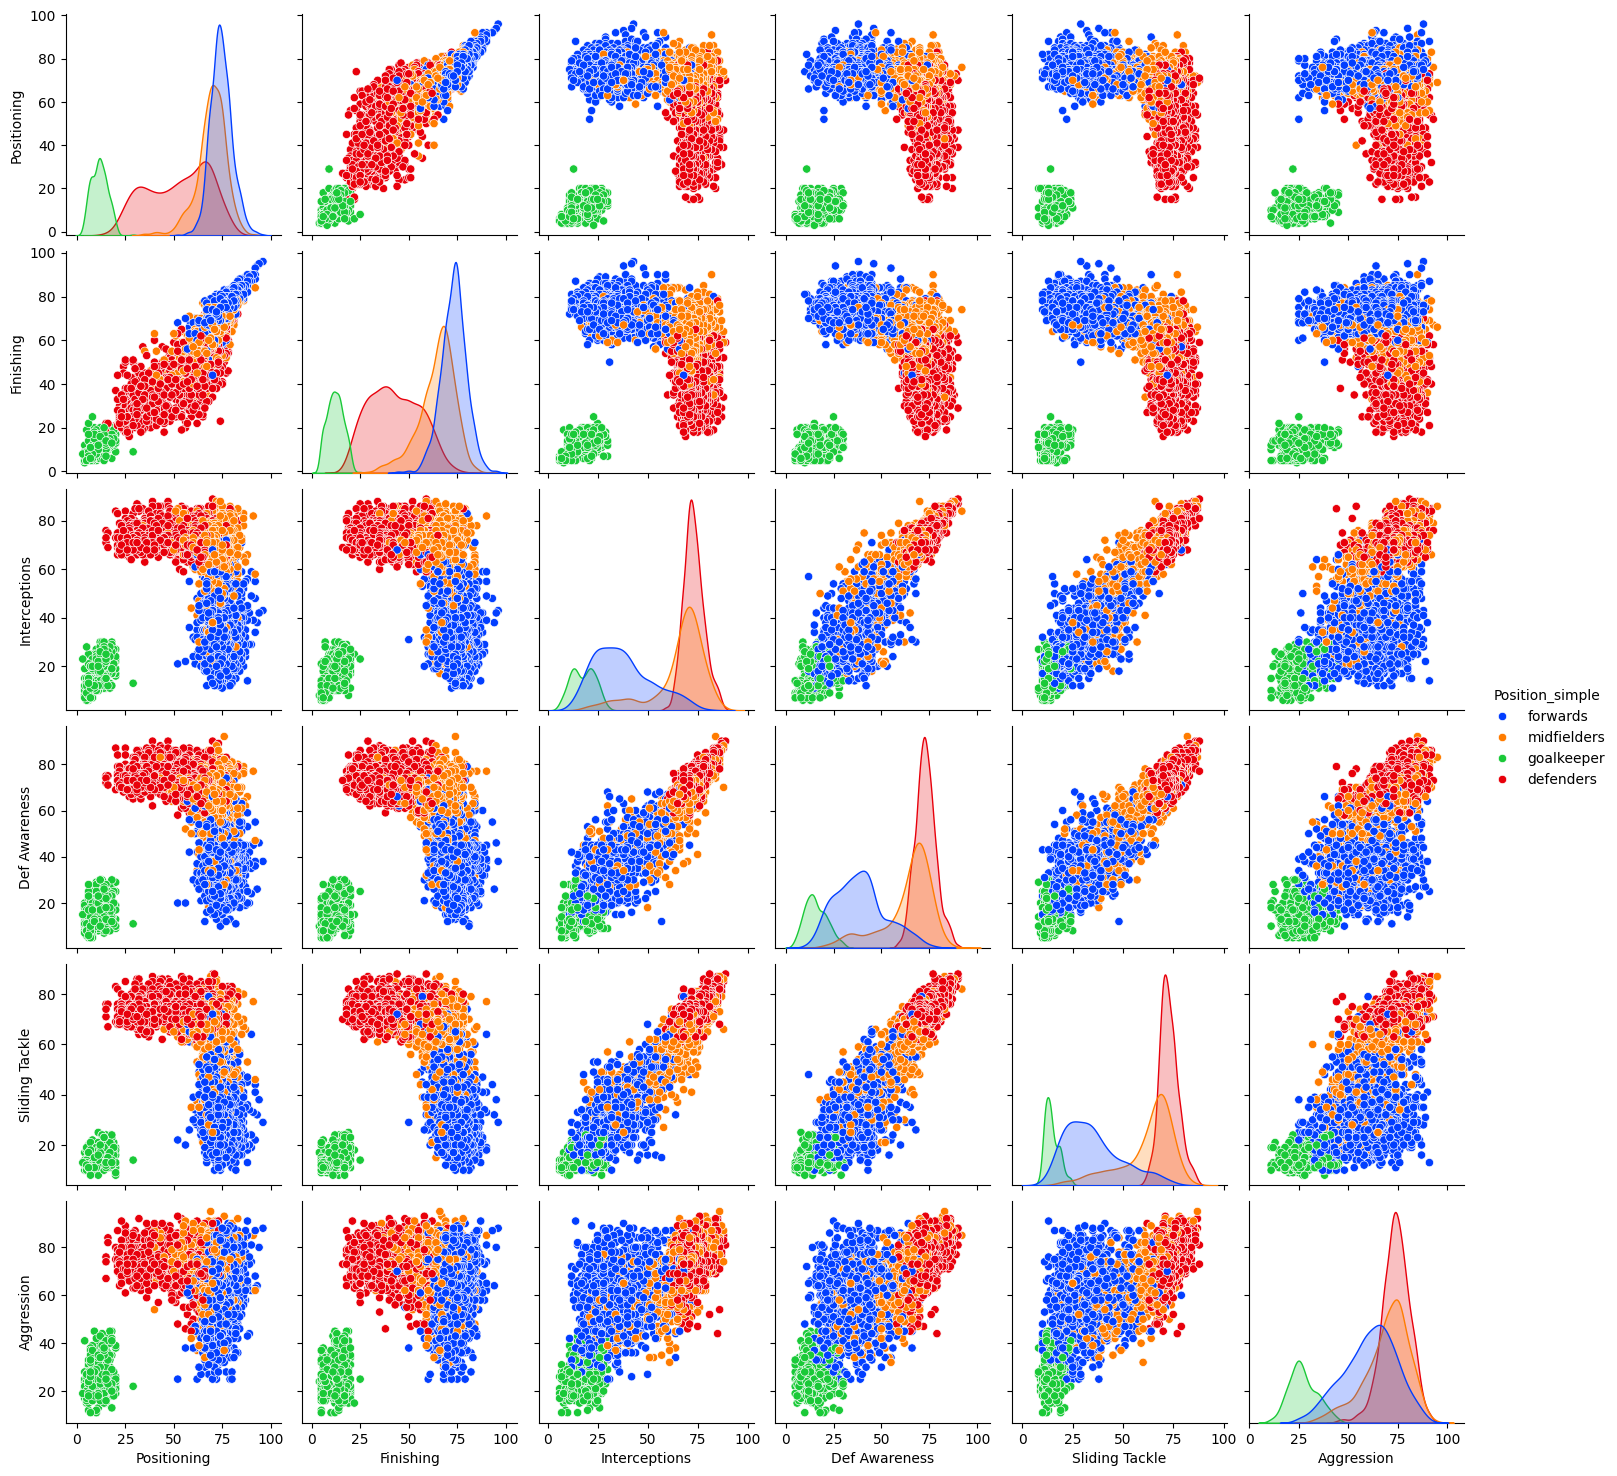

In [24]:
df_int = pd.concat([df_n[interesting_skills], df_n['Position_simple']], axis=1)
sns.pairplot(df_int, hue="Position_simple",palette='bright')

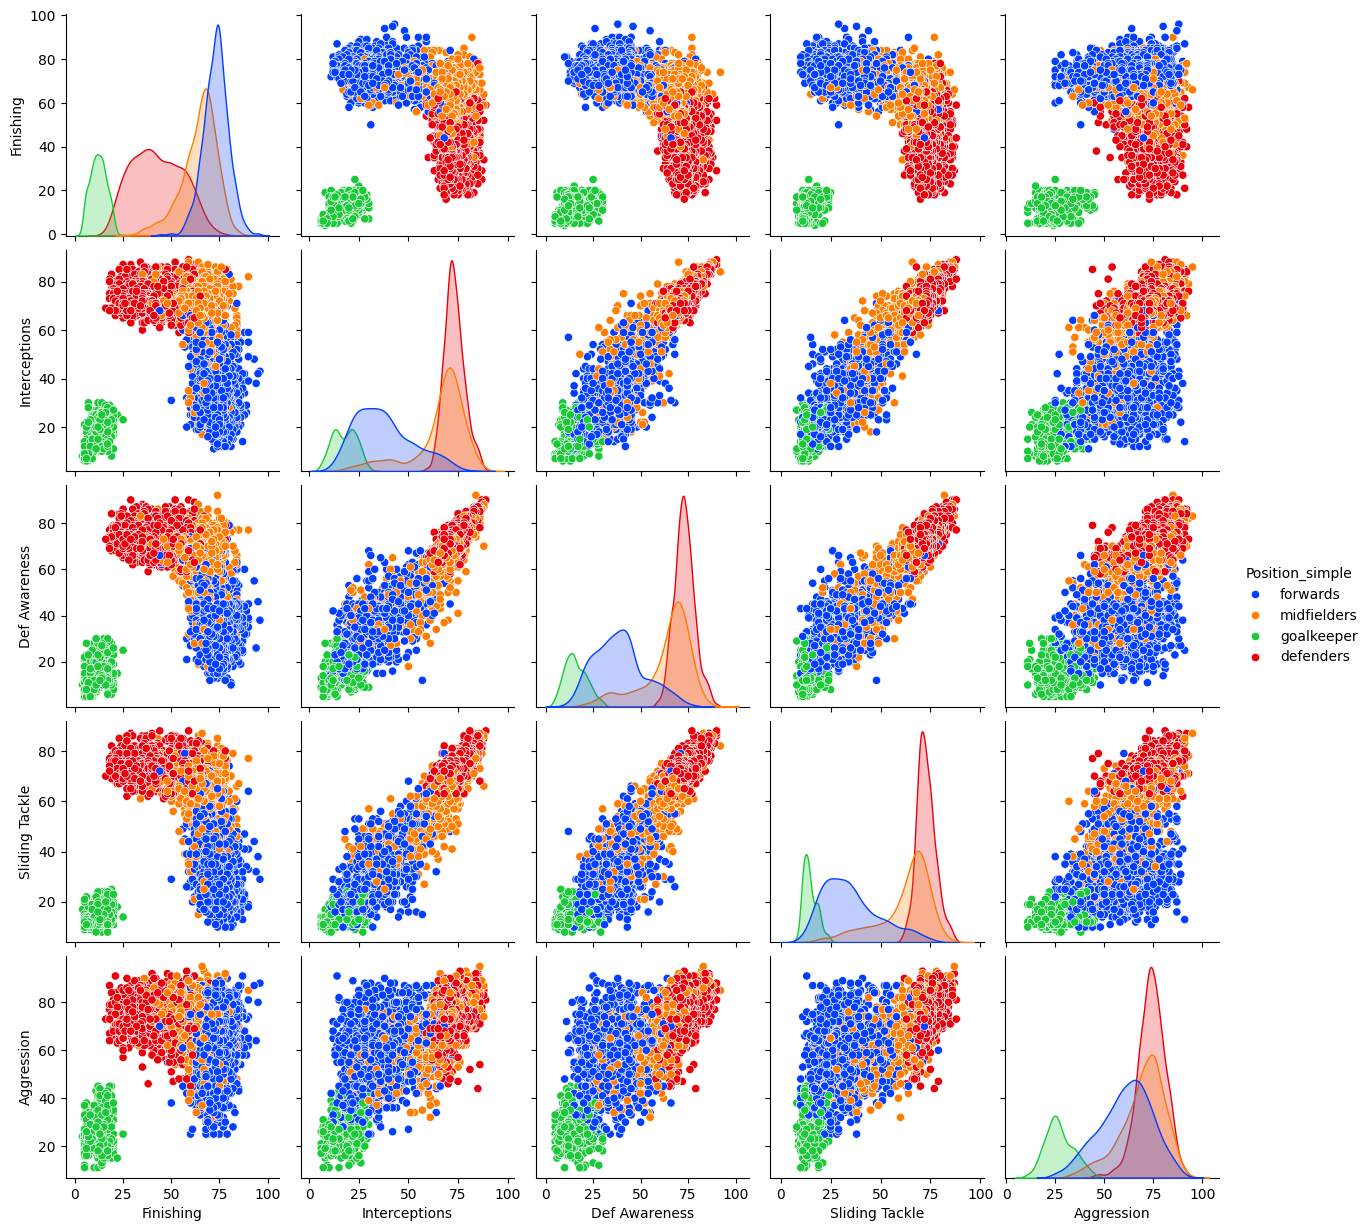

In [25]:
df_int = pd.concat([df_n[interesting_skills].drop('Positioning', axis = 1), df_n['Position_simple']], axis=1)
sns.pairplot(df_int, hue="Position_simple",palette='bright')

⚽ Midfielders (MC, CDM, CAM, etc.)

Controlan el juego, distribuyen pases, aportan visión.

Necesitan buen manejo de balón y resistencia.

🛡️ Defenders (CB, LB, RB, etc.)

Su foco está en recuperar el balón, marcar y resistir físicamente.

Importan más los duelos físicos y la defensa.

🔑 Columnas útiles para diferenciarlos

Passing →

Midfielders tienden a tener puntajes más altos.

Defenders suelen más bajos.

Vision / Short Passing / Long Passing →

Muy característico de mediocampistas (CAM, CM).

Defenders suelen flojos en esto.

Defending →

Alto en defensores.

Más bajo en mediocampistas ofensivos/creativos.

Interceptions / Standing Tackle / Sliding Tackle →

Mucho más altos en defensores.

Mediocampistas suelen tener valores intermedios.

Physicality (y subcomponentes: Strength, Aggression, Stamina) →

Defenders (especialmente CB) suelen más fuertes y agresivos.

Midfielders destacan más por Stamina que por Strength.

🔥 Pares de variables recomendados para scatterplots

(si buscás máxima separación visual entre Midfielders y Defenders):

Passing vs Defending

Vision vs Interceptions

Short Passing vs Standing Tackle

Stamina vs Strength

Ball Control vs Def Awareness

In [26]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Rank', 'Name', 'OVR', 'PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed',
       'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys',
       'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Position', 'Weak foot', 'Skill moves', 'Preferred foot', 'Height',
       'Weight', 'Alternative positions', 'Age', 'Nation', 'League', 'Team',
       'play style', 'url', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Position_simple'],
      dtype='object')

## Variables

In [27]:
skills = ['PAC', 'SHO',
       'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed',
       'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys',
       'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression']

In [28]:
df_skills = df_n[skills]

In [29]:
df_n.shape, df_skills.shape

((3992, 59), (3992, 35))